---
title: 2. Accessing OCEANCOLOUR data
authors:
- gwenael_caer
- catherine_schmechtig
---

<hr>

<img src='https://gitlab.ifremer.fr/odatis/vre/tools/frameworks/-/raw/main/img/standard_banner.png' align='right' width='100%' style="margin-bottom: 1rem;"/>

<hr>

```{attention} Prerequisites
This notebook has the following prerequisites:
- **<a href=" https://data.marine.copernicus.eu/register" target="_blank">A Copernicus Marine account</a>** if you are using or plan to use the Copernicus Marine Data Store

There are no prerequisite notebooks for this module.
```

```{seealso} Learning outcomes
At the end of this notebook you will know;
* How to <font color="#2367a2">**access**</font> Global Ocean Colour data from Copernicus Marine Data Store using the `copernicusmarine` toolbox.
* How to <font color="#2367a2">**select**</font> a subset and plot the data.
```

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import copernicusmarine
import xarray as xr

/home1/datawork/gcaer/conda-env/odatis-bgc-argo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1 Load OCEANCOLOUR data

### Official access

The Global Ocean Colour product is made available by Copernicus Marine Service under the identifier `OCEANCOLOUR_GLO_BGC_L3_MY_009_103`. It is made up of several datasets, but only 4 will interest us in this use case:

* **Optics:** cmems_obs-oc_glo_bgc-optics_my_l3-multi-4km_P1D
* **Plankton:** cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D
* **Reflectance:** cmems_obs-oc_glo_bgc-reflectance_my_l3-multi-4km_P1D
* **Transparency:** cmems_obs-oc_glo_bgc-transp_my_l3-multi-4km_P1D

Copernicus Marine has set up a toolbox, called `copernicusmarine`, to access the data.

**Get a user account**

Access to Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: <a href=" https://data.marine.copernicus.eu/register" target="_blank">https://data.marine.copernicus.eu/register</a>

**Login**

Once the account has been created, you need to log in to the Copernicus Marine service to download the data. This is done using the `copernicusmarine.login()` command, and all you have to do is enter your username and password. 

**Open Dataset**

The datasets we are interested in can be accessed via various services. In this use case we are interested in the ARCO (Analysis Ready Cloud Optimize) Zarr format. This format has the particularity of storing data in the form of chunks, which allows access to part of the data without downloading the entire dataset. 

In our case, Copernicus Marine offers 2 ARCO services:
* **GeoSeries:** with a small chunk size over the time dimension and a large chunk size over longitude and latitude dimensions, optimized for analyzing large geographic domains over a short time span.
* **TimeSeries:** with a small chunk size over longitude and latitude dimensions and a large chunk size over the time dimension, optimized for analyzing the whole time series over a relatively small domain.

In [2]:
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36593,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:35431,Total threads: 2
Dashboard: /proxy/45857/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:35255,


In [3]:
# The different datasets required for this use case
dataset_ids = {
    'optics': 'cmems_obs-oc_glo_bgc-optics_my_l3-multi-4km_P1D',
    'plankton': 'cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D',
    'reflectance': 'cmems_obs-oc_glo_bgc-reflectance_my_l3-multi-4km_P1D',
    'transp': 'cmems_obs-oc_glo_bgc-transp_my_l3-multi-4km_P1D',
}

# Choose a service and a dataset name
service = 'geoseries' # or 'timeseries'
name = 'plankton'
dataset_id = dataset_ids[name]

To open a dataset, simply enter its identifier and specify the service you want to use, in our case `timeseries` or `geoseries`.

In [4]:
%%time
# Open a single dataset
ds = copernicusmarine.open_dataset(
    dataset_id = dataset_id,
    service = service, 
    chunk_size_limit = 1
)

INFO - 2025-10-29T12:23:02Z - Selected dataset version: "202411"
INFO - 2025-10-29T12:23:02Z - Selected dataset part: "default"


CPU times: user 647 ms, sys: 194 ms, total: 842 ms
Wall time: 2.6 s


## 2.2 Analyse data

Now that we've loaded the data, let's start exploring it. 

*NB: here we will concentrate on the `plankton` dataset, but the operations are necessary for the other datasets.*

In [5]:
ds

<xarray.Dataset> Size: 46TB
Dimensions:              (time: 10275, latitude: 4320, longitude: 8640)
Coordinates:
  * time                 (time) datetime64[ns] 82kB 1997-09-04 ... 2025-10-21
  * latitude             (latitude) float32 17kB -89.98 -89.94 ... 89.94 89.98
  * longitude            (longitude) float32 35kB -180.0 -179.9 ... 179.9 180.0
Data variables: (12/21)
    CHL                  (time, latitude, longitude) float32 2TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    CHL_uncertainty      (time, latitude, longitude) float64 3TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    DIATO                (time, latitude, longitude) float32 2TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    DIATO_uncertainty    (time, latitude, longitude) float64 3TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    DINO                 (time, latitude, longitude) float32 2TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    DINO_uncertainty     (time, latitude, longitude) float64 3TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ...                   ...
    PICO_uncertainty     (time, latitude, longitude) float64 3TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    PROCHLO              (time, latitude, longitude) float32 2TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    PROCHLO_uncertainty  (time, latitude, longitude) float64 3TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    PROKAR               (time, latitude, longitude) float32 2TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    PROKAR_uncertainty   (time, latitude, longitude) float64 3TB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    flags                (time, latitude, longitude) int8 384GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
Attributes: (12/91)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_end:               2024-10-02T03:39:59Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-09-30T19:51:46Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

Note that our dataset contains 3 dimensions (time, longitude, latitude) and several variables. 

In [6]:
print(f'Number of variables: {len(ds)}')

Number of variables: 21


ARCO formats are very practical because they allow access to a very large quantity of data from a single source, without loading everything into memory. But just how big is our dataset? 

To do this, we're going to look at the number of bytes in our dataset and display it in gigabytes.

In [7]:
print(f"Datacube size: {round(ds.nbytes / (1024 ** 3))} Gb")

Datacube size: 43218 Gb


Wow... dozens of terabytes of data, our dataset is truly massive. Yet, thanks to the ARCO format and the S3 protocol, we will be able to work with it almost as if the data were in a single local file.

For example, if we are interested in the chlorophyll-a data for 2020-01-01, all we need to do is select it by doing:

In [8]:
sub = ds.sel(time='2020-01-01').CHL

And to display them, all you need to do is:

```{attention}
In the following plot, we use:

:::python
sub.isel(latitude=slice(None, None, 10), longitude=slice(None, None, 10))
:::

This is done to **speed up the display** by **subsampling the data**, showing only **1 point out of 10** in both latitude and longitude.
Without this subsampling, plotting the full dataset could be very slow or consume a lot of memory.
```

CPU times: user 1.23 s, sys: 190 ms, total: 1.42 s
Wall time: 6.61 s


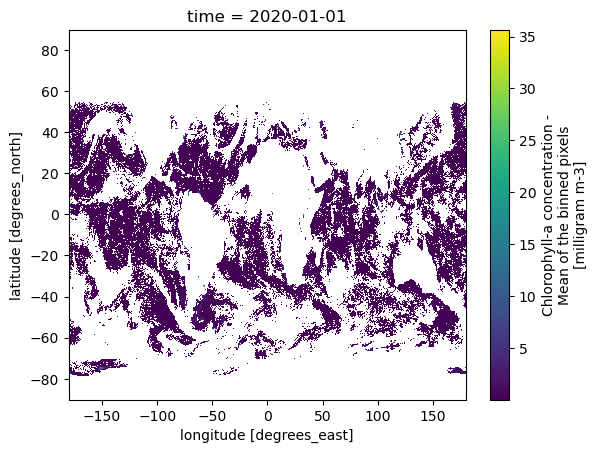

In [9]:
%%time
sub.isel(latitude=slice(None, None, 10), longitude=slice(None, None, 10)).plot()